# ***Import and download all libraries and dependencies***

In [ ]:
# Adding all necessary imports

# Pandas library used to read & manipulate data.
import pandas as pd
# nltk librabry is a natural language toolkit and contains text processing features which is useful for tokenization and classification.
import nltk
# sklearn library is used to learn dataset using various sklearn algorithms
import sklearn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download("wordnet")

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


# ***Import the required wine dataset downloaded from moodle***

In [ ]:
# Importing wine dataset downloaded from moodle
df = pd.read_csv("/content/winemag-data.csv")
df

,Unnamed: 0,country,description,designation,points,price,province,variety
0,172,Greece,"Aromas of leather, cherry and plum lead this b...",NaN,89,17.0,Nemea,Agiorgitiko
1,481,Greece,"Aromas of leather, cherry and plum lead this b...",NaN,89,17.0,Nemea,Agiorgitiko
2,1331,Greece,Savory meat and vanilla on the nose lead into ...,Anemos,88,19.0,Peloponnese,Agiorgitiko
3,5261,Greece,Forest fruit and pepper aromas lead into flavo...,Mythic River,87,15.0,Nemea,Agiorgitiko
4,5273,Greece,This is a great example of a variety Americans...,Single Vineyard Selection,87,25.0,Nemea,Agiorgitiko
...,...,...,...,...,...,...,...,...
3052,36501,Portugal,This wine is made from the Bastardo grape whic...,NaN,86,32.0,Douro,Bastardo
3053,49930,Portugal,"A very light-colored wine, almost rosé, typica...",Conceito Bastardo,84,30.0,Duriense,Bastardo
3054,87861,Portugal,"The Bastardo grape is rare in the Douro, but i...",Conceito Bastardo,85,30.0,Duriense,Bastardo
3055,104980,Portugal,"A very light-colored wine, almost rosé, typica...",Conceito Bastardo,84,30.0,Duriense,Bastardo


# ***Data cleaning and preparation : Remove duplicates*** 

In [ ]:
# Check duplicates rows and create a column to check duplicate values
df['duplicate'] = df.duplicated(subset=None, keep='first')
df['duplicate']

0       False
1       False
2       False
3       False
4       False
        ...  
3052    False
3053    False
3054    False
3055    False
3056    False
Name: duplicate, Length: 3057, dtype: bool

In [ ]:
# Remove duplicates rows where duplicate is marked as true
df = df[df['duplicate'] == False]
df

,Unnamed: 0,country,description,designation,points,price,province,variety,duplicate
0,172,Greece,"Aromas of leather, cherry and plum lead this b...",NaN,89,17.0,Nemea,Agiorgitiko,False
1,481,Greece,"Aromas of leather, cherry and plum lead this b...",NaN,89,17.0,Nemea,Agiorgitiko,False
2,1331,Greece,Savory meat and vanilla on the nose lead into ...,Anemos,88,19.0,Peloponnese,Agiorgitiko,False
3,5261,Greece,Forest fruit and pepper aromas lead into flavo...,Mythic River,87,15.0,Nemea,Agiorgitiko,False
4,5273,Greece,This is a great example of a variety Americans...,Single Vineyard Selection,87,25.0,Nemea,Agiorgitiko,False
...,...,...,...,...,...,...,...,...,...
3052,36501,Portugal,This wine is made from the Bastardo grape whic...,NaN,86,32.0,Douro,Bastardo,False
3053,49930,Portugal,"A very light-colored wine, almost rosé, typica...",Conceito Bastardo,84,30.0,Duriense,Bastardo,False
3054,87861,Portugal,"The Bastardo grape is rare in the Douro, but i...",Conceito Bastardo,85,30.0,Duriense,Bastardo,False
3055,104980,Portugal,"A very light-colored wine, almost rosé, typica...",Conceito Bastardo,84,30.0,Duriense,Bastardo,False


In [ ]:
# Remove duplicate column after removing duplicates
del df['duplicate']
df

,Unnamed: 0,country,description,designation,points,price,province,variety
0,172,Greece,"Aromas of leather, cherry and plum lead this b...",NaN,89,17.0,Nemea,Agiorgitiko
1,481,Greece,"Aromas of leather, cherry and plum lead this b...",NaN,89,17.0,Nemea,Agiorgitiko
2,1331,Greece,Savory meat and vanilla on the nose lead into ...,Anemos,88,19.0,Peloponnese,Agiorgitiko
3,5261,Greece,Forest fruit and pepper aromas lead into flavo...,Mythic River,87,15.0,Nemea,Agiorgitiko
4,5273,Greece,This is a great example of a variety Americans...,Single Vineyard Selection,87,25.0,Nemea,Agiorgitiko
...,...,...,...,...,...,...,...,...
3052,36501,Portugal,This wine is made from the Bastardo grape whic...,NaN,86,32.0,Douro,Bastardo
3053,49930,Portugal,"A very light-colored wine, almost rosé, typica...",Conceito Bastardo,84,30.0,Duriense,Bastardo
3054,87861,Portugal,"The Bastardo grape is rare in the Douro, but i...",Conceito Bastardo,85,30.0,Duriense,Bastardo
3055,104980,Portugal,"A very light-colored wine, almost rosé, typica...",Conceito Bastardo,84,30.0,Duriense,Bastardo


# ***Declare and initialize pre defined stopwords***
**Stopwords : Stopwords are those words which are most commonlly used words in a sentence and carry very less information.**

In [ ]:
# Define stopwords

stopWords = set(stopwords.words('english'))
stop_words =[',', '.', '\'', ';',':','!', '$','#', '&']

for character in stop_words :

  if character not in stopWords :
    stopWords.add(character)

print(stopWords)
#stop_words =[',', '.', '\'', ';',':','!', '$','#', '&']


{'and', 'when', 'through', 'about', 'mightn', 'now', "should've", 'such', 'their', 'under', 'not', 'yours', 'can', 'once', 'no', "hadn't", 'them', 'needn', 'a', 'same', 'because', 'he', ';', 'being', "don't", 'until', 'why', 'then', 'other', 'am', 'these', 'the', 'my', 'ma', 'she', 'its', 'is', 'up', 'himself', "you'll", 'do', 'nor', 'o', "you'd", 'off', "mustn't", 'had', 'was', 'i', 'themselves', 'itself', 'ourselves', "won't", 'been', 'how', "shan't", 'your', 'this', 'wouldn', 'doesn', 'on', 'myself', 'hasn', 'where', 'be', 'too', 's', 'before', 'shouldn', 'we', 'an', "couldn't", "didn't", 'has', 'aren', 'all', '.', "mightn't", "wouldn't", 'yourself', '$', 'above', 'were', 'at', 'both', 'below', 'to', 'if', 'what', 'll', 'over', 'hers', "it's", 'very', 'didn', 'me', "haven't", ',', 'out', "aren't", 'you', "shouldn't", 'his', 'are', 'each', 'few', "you've", 'theirs', 'some', "'", 'there', 'should', 'y', 'with', 'shan', '#', 'won', 're', 'of', 'herself', '&', "needn't", 'after', 'from'

# ***Word Lemmatization : Convert the words into its base form or dictionary format of the word***

In [ ]:
def custom_tokenizer(sentence) :
  words = sentence.lower().split()

  cleaned_words = []
  lemmatizer = WordNetLemmatizer()

  for word in words:
    if word not in stopWords :
      if "," in word :
        cleaned_words.append(str(word).replace(",",""))
      else :
        cleaned_words.append(word)

  lematize_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
  
  return lematize_words

# ***Sentence Preparation : Prepare a final sentence of the description after using word Lemmatizer***

In [ ]:
# Create final prepared sentence after removing stop words and lemmatize

temp_arr = []
for item in df.description :
  temp_arr.append(custom_tokenizer(item))

final_sentence = []

for words_modification_parent in temp_arr :
  temp_sent = ""
  for words_modification_child in words_modification_parent :
    temp_sent = temp_sent + " " + words_modification_child

  final_sentence.append(temp_sent)

df['prepared_sentence'] = final_sentence
df['prepared_sentence']

0        aroma leather cherry plum lead balanced red b...
1        aroma leather cherry plum lead balanced red b...
2        savory meat vanilla nose lead flavor cherry p...
3        forest fruit pepper aroma lead flavor blackbe...
4        great example variety american still learning...
                              ...                        
3052     wine made bastardo grape which name suggests ...
3053     light-colored wine almost rosé typical bastar...
3054     bastardo grape rare douro produce fresh style...
3055     light-colored wine almost rosé typical bastar...
3056     bastardo grape rare douro produce fresh style...
Name: prepared_sentence, Length: 3057, dtype: object

In [ ]:
# # Count the most frequent words

# from collections import Counter
# Counter(" ".join(df["prepared_sentence"]).split()).most_common(5)

# ***Top 5 most used words : Find the the top 5 most used words in the description after removing stopwords and applying word lemmitizer***

In [ ]:
# Count the most frequent words

words_arr = []
words_str = ""

word_count_dictionary = {}

for text in df["prepared_sentence"] :

  words = text.replace(".", "")
  words = words.split(" ")

  for word in words :
    words_arr.append(word)
    words_str = words_str + " " + word.strip()

    if word in word_count_dictionary.keys() :
      count = int(word_count_dictionary[word]) + 1
      word_count_dictionary.update({word:count})
    else :
      word_count_dictionary.update({word:1})


# print(words_arr)
# print(words_str)

word_count_dictionary = dict(sorted(word_count_dictionary.items(), key=lambda item: item[1]))

word_count_dictionary_1 = list(word_count_dictionary)[-2]
word_count_dictionary_2 = list(word_count_dictionary)[-3]
word_count_dictionary_3 = list(word_count_dictionary)[-4]
word_count_dictionary_4 = list(word_count_dictionary)[-5]
word_count_dictionary_5 = list(word_count_dictionary)[-6]

print("Top 5 most used words :")
print(word_count_dictionary_1)
print(word_count_dictionary_2)
print(word_count_dictionary_3)
print(word_count_dictionary_4)
print(word_count_dictionary_5)



Top 5 most used words :
wine
fruit
aroma
flavor
acidity


# ***WordCloud illustration : Plot the word cloud illustration from the sentence.***

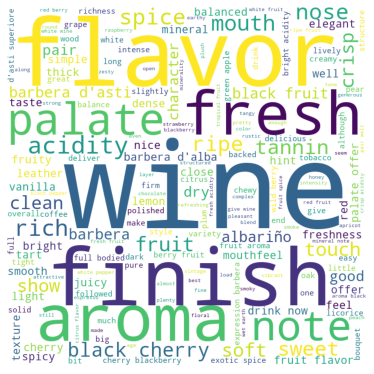

In [ ]:
%matplotlib inline

all_words = '' 

for arg in df["prepared_sentence"]: 
    tokens = arg.split()
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plotting the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()